In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB as SklearnMultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score





In [ ]:
https://drive.google.com/file/d/1h4fqEVOCclumoK8MSXElGHl8pwJDtIXQ/view?usp=drive_link

In [ ]:
!gdown 1h4fqEVOCclumoK8MSXElGHl8pwJDtIXQ

Downloading...
From: https://drive.google.com/uc?id=1h4fqEVOCclumoK8MSXElGHl8pwJDtIXQ
To: /content/spam.csv
100% 504k/504k [00:00<00:00, 80.2MB/s]


# Q1

## Pre processing

read the csv file and save in df

In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


keep only column 1 and 2 (remove other) and rename column

In [ ]:
# Keep only the necessary columns
df = df[['v1', 'v2']]

# Rename columns for clarity
df.columns = ['label', 'message']

# Check the result
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


map labels

In [ ]:
# Map labels: 'ham' → 0, 'spam' → 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check the result
df.head()

<ipython-input-9-1d51944ea90b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


missing value

In [ ]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
label      0
message    0
dtype: int64


Check number of duplicate rows

In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 403


In [ ]:
df.drop_duplicates(inplace=True)

<ipython-input-12-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
print("Dataset shape after cleaning:", df.shape)

Dataset shape after cleaning: (5169, 2)


In [ ]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


 Code to Count Each Label

In [ ]:
# Count of each label (0 = ham, 1 = spam)
label_counts = df['label'].value_counts()
print(label_counts)


label
0    4516
1     653
Name: count, dtype: int64


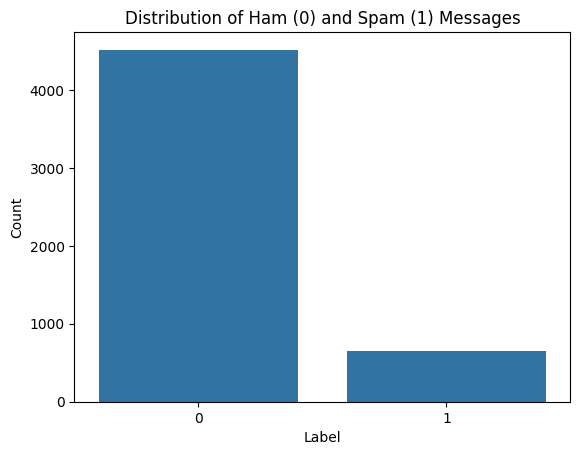

In [ ]:
# Plot label counts
sns.countplot(x='label', data=df)
plt.title("Distribution of Ham (0) and Spam (1) Messages")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

## part c (Custom implementation of Multinomial Naive Bayes)

In [ ]:
# Custom implementation of Multinomial Naive Bayes
class MultiNB:
    def __init__(self, alpha=1):
        self.alpha = alpha

    def _prior(self):
        """
        Calculates prior for each unique class in y. P(y)
        """
        P = np.zeros((self.n_classes_))
        _, self.dist = np.unique(self.y, return_counts=True)
        for i in range(self.classes_.shape[0]):
            P[i] = self.dist[i] / self.n_samples
        return P

    def fit(self, X, y):
        """
        Calculates the following things-
            class_priors_ is list of priors for each y.
            N_yi: 2D array. Contains for each class in y, the number of time each feature i appears under y.
            N_y: 1D array. Contains for each class in y, the number of all features appear under y.
        """
        self.y = y
        self.n_samples, self.n_features = X.shape
        self.classes_ = np.unique(y)
        self.n_classes_ = self.classes_.shape[0]
        self.class_priors_ = self._prior()

        # distinct values in each features
        self.uniques = []
        for i in range(self.n_features):
            tmp = np.unique(X[:,i])
            self.uniques.append(tmp)

        self.N_yi = np.zeros((self.n_classes_, self.n_features)) # feature count
        self.N_y = np.zeros((self.n_classes_)) # total count
        for i in self.classes_: # x axis
            indices = np.argwhere(self.y==i).flatten()
            columnwise_sum = []
            for j in range(self.n_features): # y axis
                columnwise_sum.append(np.sum(X[indices,j]))

            self.N_yi[i] = columnwise_sum # 2d
            self.N_y[i] = np.sum(columnwise_sum) # 1d

        return self

    def _theta(self, x_i, i, h):
        """
        Calculates theta_yi. aka P(xi | y) using eqn(1) in the notebook.
        """
        Nyi = self.N_yi[h,i]
        Ny  = self.N_y[h]

        numerator = Nyi + self.alpha
        denominator = Ny + (self.alpha * self.n_features)

        return (numerator / denominator)**x_i

    def _likelyhood(self, x, h):
        """
        Calculates P(E|H) = P(E1|H) * P(E2|H) .. * P(En|H).
        """
        tmp = []
        for i in range(x.shape[0]):
            tmp.append(self._theta(x[i], i, h))

        return np.prod(tmp)

    def predict(self, X):
        samples, features = X.shape
        self.predict_proba = np.zeros((samples, self.n_classes_))

        for i in range(X.shape[0]):
            joint_likelyhood = np.zeros((self.n_classes_))

            for h in range(self.n_classes_):
                joint_likelyhood[h] = self.class_priors_[h] * self._likelyhood(X[i], h) # P(y) P(X|y)

            denominator = np.sum(joint_likelyhood)

            for h in range(self.n_classes_):
                numerator = joint_likelyhood[h]
                self.predict_proba[i,h] = (numerator / denominator)

        indices = np.argmax(self.predict_proba, axis=1)
        return self.classes_[indices]

## part D

Train-test split

In [ ]:
# Split the data
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

Convert text to features using CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_text).toarray()
X_test = vectorizer.transform(X_test_text).toarray()
print("Feature matrix shape:", X_train.shape)

Feature matrix shape: (4135, 7657)


### 1. Custom Implementation

In [ ]:
start_time = time.time()
custom_nb = MultiNB(alpha=1)
custom_nb.fit(X_train, y_train)
custom_y_pred = custom_nb.predict(X_test)
custom_time = time.time() - start_time

### 2. Scikit-learn Implementation

In [ ]:
start_time = time.time()
sklearn_nb = SklearnMultinomialNB(alpha=1)
sklearn_nb.fit(X_train, y_train)
sklearn_y_pred = sklearn_nb.predict(X_test)
sklearn_time = time.time() - start_time

### Performance metrics


--- Custom Implementation Results ---
Time taken: 21.730798959732056 seconds
Accuracy: 0.9854932301740812
Precision: 0.9850746268656716
Recall: 0.9103448275862069
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034

Confusion Matrix:
[[887   2]
 [ 13 132]]


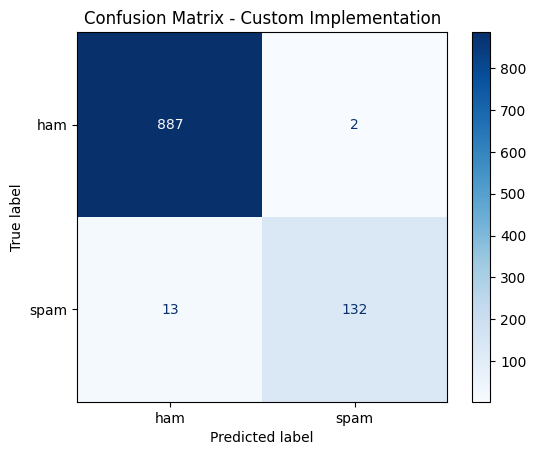


--- Scikit-learn Implementation Results ---
Time taken: 1.0222537517547607 seconds
Accuracy: 0.9854932301740812
Precision: 0.9850746268656716
Recall: 0.9103448275862069
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034

Confusion Matrix:
[[887   2]
 [ 13 132]]


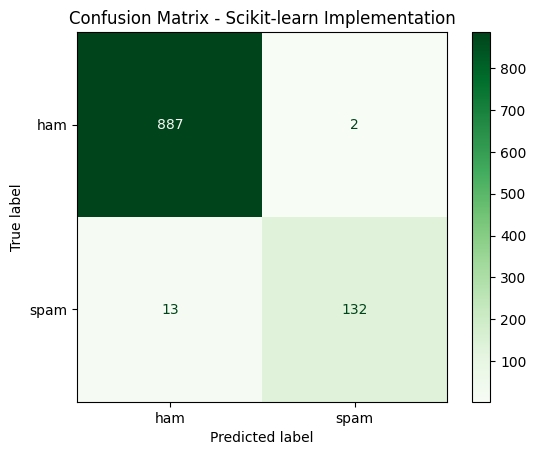


Number of disagreements between implementations: 0
Percentage of disagreements: 0.0 %


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix

# --- Custom Implementation Results ---
print("\n--- Custom Implementation Results ---")
print("Time taken:", custom_time, "seconds")
print("Accuracy:", accuracy_score(y_test, custom_y_pred))

# Precision و Recall برای مدل Custom
precision_custom = precision_score(y_test, custom_y_pred, pos_label=1)
recall_custom = recall_score(y_test, custom_y_pred, pos_label=1)

print("Precision:", precision_custom)
print("Recall:", recall_custom)

print("Classification Report:")
print(classification_report(y_test, custom_y_pred, target_names=['ham', 'spam']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, custom_y_pred))

# رسم Confusion Matrix برای Custom
disp_custom = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, custom_y_pred),
                                     display_labels=['ham', 'spam'])
disp_custom.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Custom Implementation")
plt.show()

# --- Scikit-learn Implementation Results ---
print("\n--- Scikit-learn Implementation Results ---")
print("Time taken:", sklearn_time, "seconds")
print("Accuracy:", accuracy_score(y_test, sklearn_y_pred))

# Precision و Recall برای مدل Sklearn
precision_sklearn = precision_score(y_test, sklearn_y_pred, pos_label=1)
recall_sklearn = recall_score(y_test, sklearn_y_pred, pos_label=1)

print("Precision:", precision_sklearn)
print("Recall:", recall_sklearn)

print("Classification Report:")
print(classification_report(y_test, sklearn_y_pred, target_names=['ham', 'spam']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, sklearn_y_pred))

# رسم Confusion Matrix برای Sklearn
disp_sklearn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, sklearn_y_pred),
                                      display_labels=['ham', 'spam'])
disp_sklearn.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - Scikit-learn Implementation")
plt.show()

# --- Compare predictions ---
disagreements = sum(custom_y_pred != sklearn_y_pred)
print("\nNumber of disagreements between implementations:", disagreements)
print("Percentage of disagreements:", disagreements / len(y_test) * 100, "%")


## part F

Dataset shape after preprocessing: (5169, 2)
Class distribution:
target
0    4516
1     653
Name: count, dtype: int64
Feature matrix shape: (4135, 7657)
Minimum risk threshold: 0.150

--- Standard Threshold (0.500) ---
Accuracy: 0.985
Precision: 0.985
Recall: 0.910
F1 Score: 0.946
Total Risk: 32.581
Confusion Matrix:
[[887   2]
 [ 13 132]]

--- Optimal Threshold (0.167) ---
Accuracy: 0.981
Precision: 0.931
Recall: 0.931
F1 Score: 0.931
Total Risk: 25.463
Confusion Matrix:
[[879  10]
 [ 10 135]]

--- Empirical Optimal Threshold (0.150) ---
Accuracy: 0.979
Precision: 0.918
Recall: 0.931
F1 Score: 0.925
Total Risk: 25.536
Confusion Matrix:
[[877  12]
 [ 10 135]]

--- Threshold Comparison ---
                     Threshold  Accuracy  Precision    Recall  F1 Score  \
Standard              0.500000  0.985493   0.985075  0.910345  0.946237   
Theoretical Optimal   0.166667  0.980658   0.931034  0.931034  0.931034   
Empirical Optimal     0.150000  0.978723   0.918367  0.931034  0.924658   

 

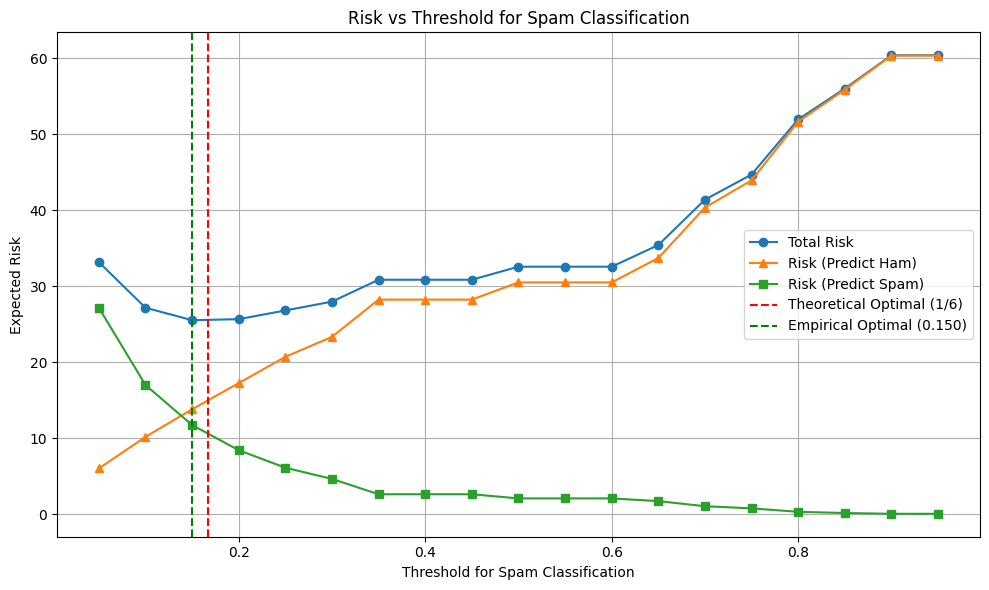

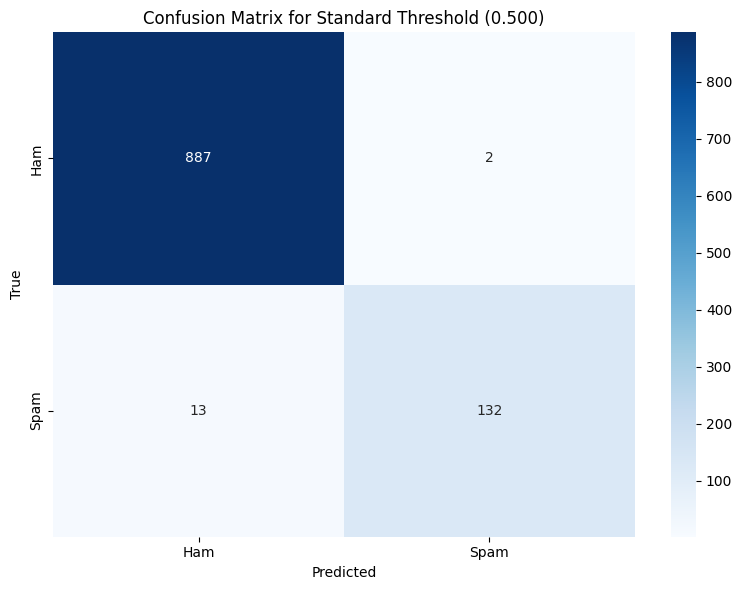

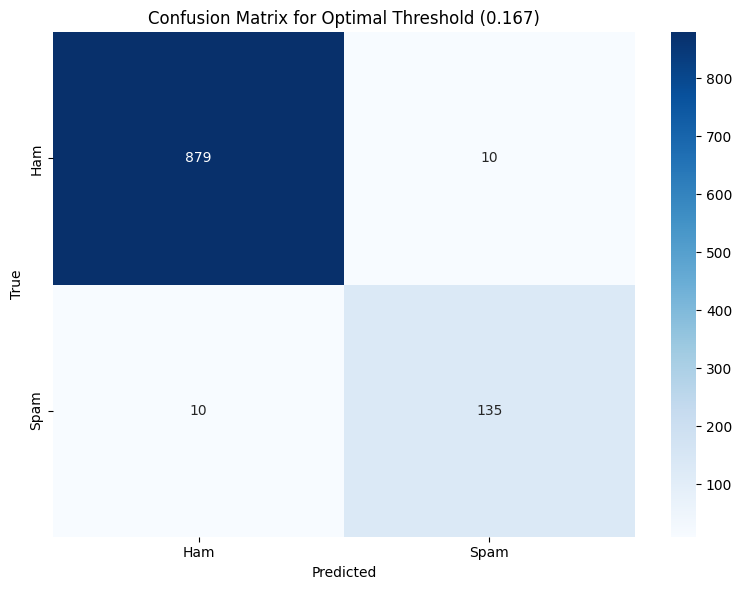

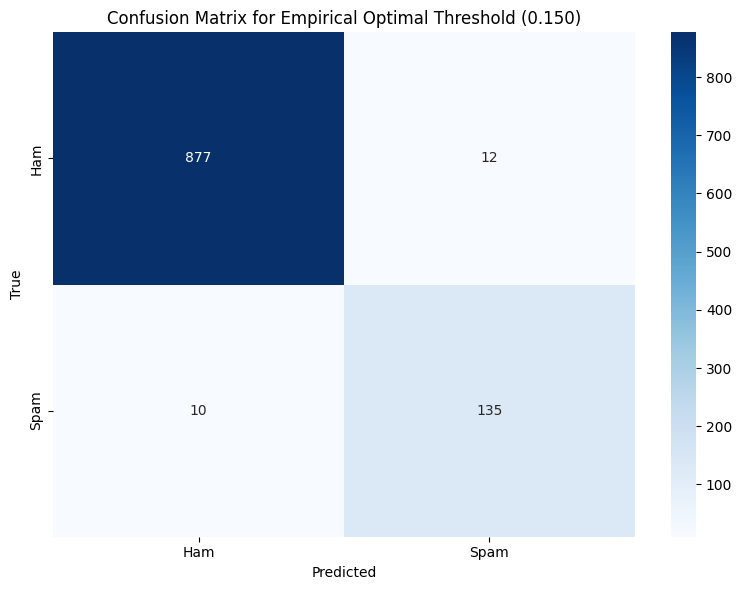

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming we're working with a CSV file that has the structure shown in your second image
df = pd.read_csv('spam.csv', encoding='latin-1')

# Keep only the first two columns (v1 and v2 based on your image)
df = df.iloc[:, 0:2]

# Rename columns to target and text
df.columns = ['target', 'text']

# Drop missing values and duplicates
df = df.dropna()
df = df.drop_duplicates()

# Map 'ham' to 0 and 'spam' to 1
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

print("Dataset shape after preprocessing:", df.shape)
print("Class distribution:")
print(df['target'].value_counts())

# Split the data
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['text'], df['target'], test_size=0.2, random_state=42
)

# Convert text to features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

print("Feature matrix shape:", X_train.shape)

# Train a standard Multinomial Naive Bayes classifier
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)

# Get the probability estimates for test data
y_prob = mnb.predict_proba(X_test)
# y_prob[:,1] contains P(spam|x) for each message x

# Function to calculate expected risk
def calculate_risk(y_prob_spam, threshold):
    """
    Calculate the expected risk given spam probabilities and a decision threshold
    Args:
        y_prob_spam: Array of probabilities that messages are spam
        threshold: Threshold above which to classify as spam
    Returns:
        tuple: (total risk, risk for spam=0 decisions, risk for spam=1 decisions)
    """
    # MODIFIED Cost matrix: [ham, spam] x [predict_ham, predict_spam]
    # cost[i,j] is the cost of predicting j when true class is i
    cost = np.array([[0, 1],   # Cost for ham: 0 if correctly classified, 1 if classified as spam
                     [5, 0]])  # Cost for spam: 5 if classified as ham, 0 if correctly classified

    # Make predictions based on threshold
    y_pred = (y_prob_spam > threshold).astype(int)

    # Calculate risk for each prediction
    risk_values = []
    for i in range(len(y_prob_spam)):
        p_spam = y_prob_spam[i]
        p_ham = 1 - p_spam

        # Calculate risk for predicting ham
        risk_ham = cost[0,0] * p_ham + cost[1,0] * p_spam  # = 0*p_ham + 5*p_spam = 5*p_spam

        # Calculate risk for predicting spam
        risk_spam = cost[0,1] * p_ham + cost[1,1] * p_spam  # = 1*p_ham + 0*p_spam = 1*p_ham

        # Store the risk for the actual prediction
        if y_pred[i] == 0:  # Predicted ham
            risk_values.append(risk_ham)
        else:  # Predicted spam
            risk_values.append(risk_spam)

    # Calculate total risk and risk components
    total_risk = sum(risk_values)
    risk_ham_decisions = sum([risk_values[i] for i in range(len(risk_values)) if y_pred[i] == 0])
    risk_spam_decisions = sum([risk_values[i] for i in range(len(risk_values)) if y_pred[i] == 1])

    return total_risk, risk_ham_decisions, risk_spam_decisions

# Calculate the optimal threshold based on our cost matrix
# The theoretical threshold is 1/6 ≈ 0.167 as derived from the new cost matrix
# Let's verify this by calculating the risk for a range of thresholds

thresholds = np.linspace(0.05, 0.95, 19)  # Adjusted range to include lower thresholds
risks = []

for threshold in thresholds:
    total_risk, risk_ham, risk_spam = calculate_risk(y_prob[:, 1], threshold)
    risks.append((threshold, total_risk, risk_ham, risk_spam))

# Convert to DataFrame for easier analysis
risk_df = pd.DataFrame(risks, columns=['threshold', 'total_risk', 'risk_ham', 'risk_spam'])

# Find the threshold with minimum total risk
min_risk_threshold = risk_df.loc[risk_df['total_risk'].idxmin(), 'threshold']
print(f"Minimum risk threshold: {min_risk_threshold:.3f}")

# Plot risk vs threshold
plt.figure(figsize=(10, 6))
plt.plot(risk_df['threshold'], risk_df['total_risk'], marker='o', label='Total Risk')
plt.plot(risk_df['threshold'], risk_df['risk_ham'], marker='^', label='Risk (Predict Ham)')
plt.plot(risk_df['threshold'], risk_df['risk_spam'], marker='s', label='Risk (Predict Spam)')
plt.axvline(x=1/6, color='r', linestyle='--', label='Theoretical Optimal (1/6)')
plt.axvline(x=min_risk_threshold, color='g', linestyle='--', label=f'Empirical Optimal ({min_risk_threshold:.3f})')
plt.xlabel('Threshold for Spam Classification')
plt.ylabel('Expected Risk')
plt.title('Risk vs Threshold for Spam Classification')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Evaluate performance with standard threshold (0.5) and optimal threshold
standard_threshold = 0.5
optimal_threshold = 1/6  # Approximately 0.167

# Function to evaluate and print metrics
def evaluate_threshold(threshold, name):
    y_pred = (y_prob[:, 1] > threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate risk
    total_risk, risk_ham, risk_spam = calculate_risk(y_prob[:, 1], threshold)

    print(f"\n--- {name} Threshold ({threshold:.3f}) ---")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Total Risk: {total_risk:.3f}")
    print("Confusion Matrix:")
    print(cm)

    # Create and return confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name} Threshold ({threshold:.3f})')
    plt.tight_layout()

    return cm, accuracy, precision, recall, f1, total_risk

# Evaluate both thresholds
standard_metrics = evaluate_threshold(standard_threshold, "Standard")
optimal_metrics = evaluate_threshold(optimal_threshold, "Optimal")

# Create a comparison table
comparison_df = pd.DataFrame({
    'Threshold': [standard_threshold, optimal_threshold, min_risk_threshold],
    'Accuracy': [standard_metrics[1], optimal_metrics[1], None],  # Will fill in the third row later
    'Precision': [standard_metrics[2], optimal_metrics[2], None],
    'Recall': [standard_metrics[3], optimal_metrics[3], None],
    'F1 Score': [standard_metrics[4], optimal_metrics[4], None],
    'Total Risk': [standard_metrics[5], optimal_metrics[5], None]
}, index=['Standard', 'Theoretical Optimal', 'Empirical Optimal'])

# Fill in empirical optimal metrics
empirical_metrics = evaluate_threshold(min_risk_threshold, "Empirical Optimal")
comparison_df.loc['Empirical Optimal', 'Accuracy'] = empirical_metrics[1]
comparison_df.loc['Empirical Optimal', 'Precision'] = empirical_metrics[2]
comparison_df.loc['Empirical Optimal', 'Recall'] = empirical_metrics[3]
comparison_df.loc['Empirical Optimal', 'F1 Score'] = empirical_metrics[4]
comparison_df.loc['Empirical Optimal', 'Total Risk'] = empirical_metrics[5]

print("\n--- Threshold Comparison ---")
print(comparison_df)

# Risk-sensitive classifier implementation
class RiskSensitiveNB:
    def __init__(self, alpha=1.0, cost_matrix=None):
        """
        Initialize the risk-sensitive Naive Bayes classifier
        Args:
            alpha: Smoothing parameter (default: 1.0)
            cost_matrix: 2x2 matrix where cost[i,j] is the cost of predicting j when true class is i
                        Default is [[0,1],[5,0]] (5x cost for false negatives)
        """
        self.alpha = alpha
        self.cost_matrix = np.array([[0, 1], [5, 0]]) if cost_matrix is None else np.array(cost_matrix)
        self.mnb = MultinomialNB(alpha=alpha)

        # Calculate optimal threshold from cost matrix
        # For a 2x2 cost matrix [[a,b],[c,d]], the optimal threshold is:
        # t = (c-d)/((b-a)+(c-d))
        a, b = self.cost_matrix[0]
        c, d = self.cost_matrix[1]
        self.threshold = (c-d)/((b-a)+(c-d))
        print(f"Calculated optimal threshold: {self.threshold:.3f}")

    def fit(self, X, y):
        """Fit the underlying MultinomialNB model"""
        self.mnb.fit(X, y)
        return self

    def predict_proba(self, X):
        """Return probability estimates"""
        return self.mnb.predict_proba(X)

    def predict(self, X):
        """
        Predict class labels using the risk-sensitive threshold
        """
        # Get probability estimates
        y_proba = self.mnb.predict_proba(X)

        # Apply risk-sensitive threshold
        y_pred = (y_proba[:, 1] > self.threshold).astype(int)
        return y_pred

# Train and evaluate the risk-sensitive classifier
risk_nb = RiskSensitiveNB(alpha=1.0)
risk_nb.fit(X_train, y_train)
risk_pred = risk_nb.predict(X_test)

# Calculate metrics
risk_accuracy = accuracy_score(y_test, risk_pred)
risk_cm = confusion_matrix(y_test, risk_pred)
risk_precision = precision_score(y_test, risk_pred)
risk_recall = recall_score(y_test, risk_pred)
risk_f1 = f1_score(y_test, risk_pred)

print("\n--- Risk-Sensitive Classifier Performance ---")
print(f"Accuracy: {risk_accuracy:.3f}")
print(f"Precision: {risk_precision:.3f}")
print(f"Recall: {risk_recall:.3f}")
print(f"F1 Score: {risk_f1:.3f}")
print("Confusion Matrix:")
print(risk_cm)

# Function to process a new message using our risk-sensitive classifier
def classify_message(message, vectorizer, classifier, threshold=None):
    """
    Classify a new message using the risk-sensitive approach
    Args:
        message: Text message to classify
        vectorizer: Fitted CountVectorizer
        classifier: Fitted classifier that provides predict_proba
        threshold: Custom threshold (if None, use default or calculated threshold)
    Returns:
        Tuple of (prediction, spam_probability, ham_probability, risk_of_decision)
    """
    # Transform the message
    features = vectorizer.transform([message])

    # Get probabilities
    probs = classifier.predict_proba(features)[0]
    p_ham, p_spam = probs

    # Use the classifier's threshold or a provided one
    if threshold is None:
        if hasattr(classifier, 'threshold'):
            threshold = classifier.threshold
        else:
            threshold = 0.5

    # Make prediction
    prediction = 1 if p_spam > threshold else 0
    prediction_label = "SPAM" if prediction == 1 else "HAM"

    # Calculate risk of the decision
    cost_matrix = np.array([[0, 1], [5, 0]])  # Modified cost matrix
    if prediction == 0:  # Ham
        risk = cost_matrix[1, 0] * p_spam + cost_matrix[0, 0] * p_ham  # 5*p_spam + 0*p_ham
    else:  # Spam
        risk = cost_matrix[0, 1] * p_ham + cost_matrix[1, 1] * p_spam  # 1*p_ham + 0*p_spam

    print(f"\nMessage: {message}")
    print(f"Classification: {prediction_label}")
    print(f"Spam probability: {p_spam:.3f}")
    print(f"Ham probability: {p_ham:.3f}")
    print(f"Risk of decision: {risk:.3f}")

    return prediction, p_spam, p_ham, risk

# Example messages to classify
test_messages = [
    "WINNER! As a valued network customer you have been selected to receive a £900 prize reward!",
    "I'll be home soon and don't want to talk about this stuff anymore tonight, k?",
    "URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot!",
    "Hi, how are you? I've been trying to reach you."
]

# Classify each message
print("\n--- Example Message Classifications ---")
for message in test_messages:
    classify_message(message, vectorizer, risk_nb)

# در صورتی که صورت سوال برعکس گفته شده باشد( صرفا حالت برعکس سوال هم نوشته شده هرچند که در سوالات این مورد خواسته نشده است)

Dataset shape after preprocessing: (5169, 2)
Class distribution:
target
0    4516
1     653
Name: count, dtype: int64
Feature matrix shape: (4135, 7657)
Minimum risk threshold: 0.800

--- Standard Threshold (0.500) ---
Accuracy: 0.985
Precision: 0.985
Recall: 0.910
F1 Score: 0.946
Total Risk: 16.455
Confusion Matrix:
[[887   2]
 [ 13 132]]

--- Optimal Threshold (0.833) ---
Accuracy: 0.984
Precision: 1.000
Recall: 0.883
F1 Score: 0.938
Total Risk: 11.855
Confusion Matrix:
[[889   0]
 [ 17 128]]

--- Empirical Optimal Threshold (0.800) ---
Accuracy: 0.984
Precision: 1.000
Recall: 0.883
F1 Score: 0.938
Total Risk: 11.855
Confusion Matrix:
[[889   0]
 [ 17 128]]

--- Threshold Comparison ---
                     Threshold  Accuracy  Precision    Recall  F1 Score  \
Standard              0.500000  0.985493   0.985075  0.910345  0.946237   
Theoretical Optimal   0.833333  0.983559   1.000000  0.882759  0.937729   
Empirical Optimal     0.800000  0.983559   1.000000  0.882759  0.937729   

 

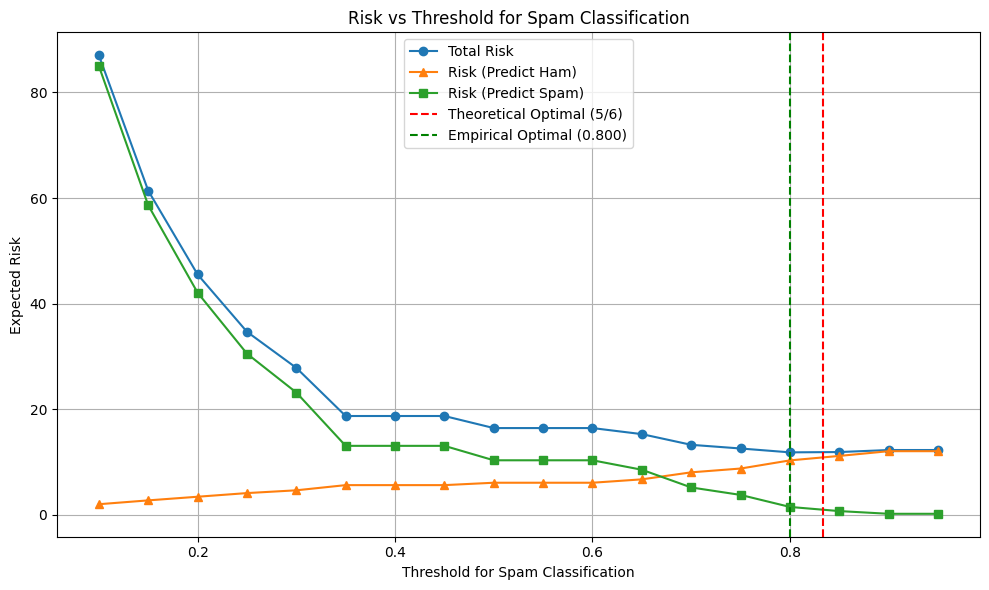

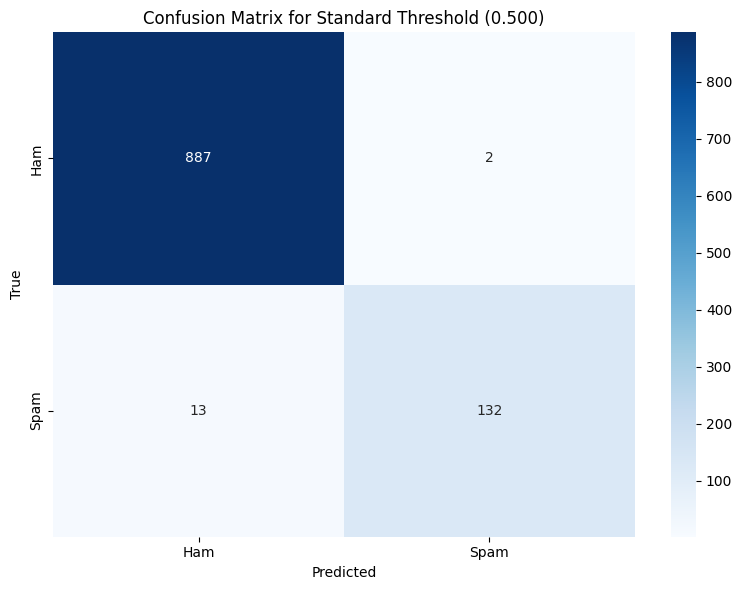

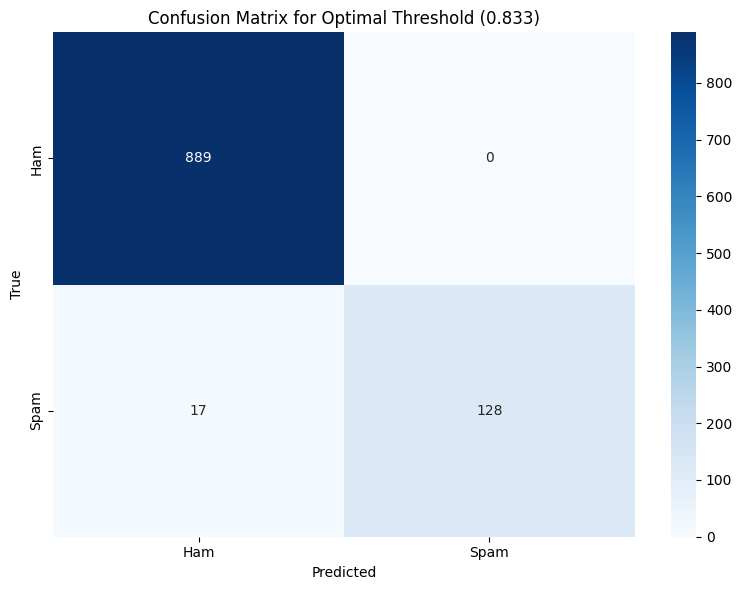

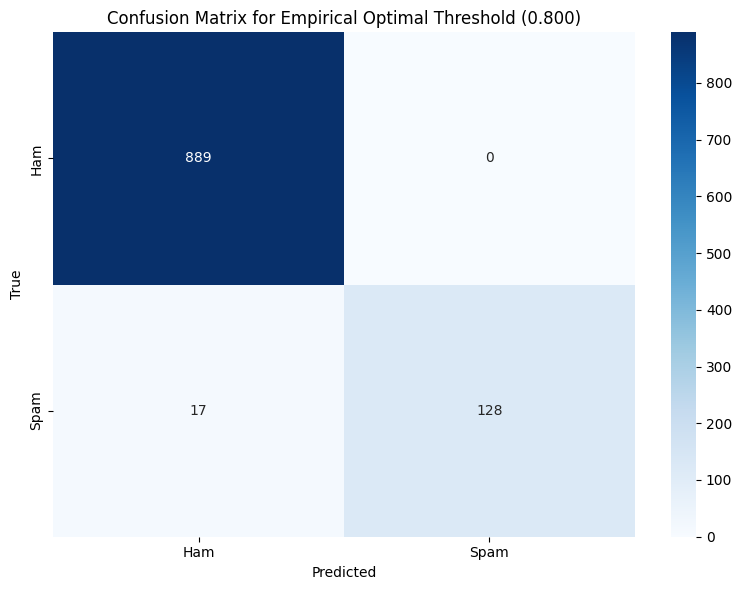

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming we're working with a CSV file that has the structure shown in your second image
df = pd.read_csv('spam.csv', encoding='latin-1')

# Keep only the first two columns (v1 and v2 based on your image)
df = df.iloc[:, 0:2]

# Rename columns to target and text
df.columns = ['target', 'text']

# Drop missing values and duplicates
df = df.dropna()
df = df.drop_duplicates()

# Map 'ham' to 0 and 'spam' to 1
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

print("Dataset shape after preprocessing:", df.shape)
print("Class distribution:")
print(df['target'].value_counts())

# Split the data
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['text'], df['target'], test_size=0.2, random_state=42
)

# Convert text to features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

print("Feature matrix shape:", X_train.shape)

# Train a standard Multinomial Naive Bayes classifier
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)

# Get the probability estimates for test data
y_prob = mnb.predict_proba(X_test)
# y_prob[:,1] contains P(spam|x) for each message x

# Function to calculate expected risk
def calculate_risk(y_prob_spam, threshold):
    """
    Calculate the expected risk given spam probabilities and a decision threshold
    Args:
        y_prob_spam: Array of probabilities that messages are spam
        threshold: Threshold above which to classify as spam
    Returns:
        tuple: (total risk, risk for spam=0 decisions, risk for spam=1 decisions)
    """
    # Cost matrix: [ham, spam] x [predict_ham, predict_spam]
    # cost[i,j] is the cost of predicting j when true class is i
    cost = np.array([[0, 5],   # Cost for ham: 0 if correctly classified, 5 if classified as spam
                     [1, 0]])  # Cost for spam: 1 if classified as ham, 0 if correctly classified

    # Make predictions based on threshold
    y_pred = (y_prob_spam > threshold).astype(int)

    # Calculate risk for each prediction
    risk_values = []
    for i in range(len(y_prob_spam)):
        p_spam = y_prob_spam[i]
        p_ham = 1 - p_spam

        # Calculate risk for predicting ham
        risk_ham = cost[0,0] * p_ham + cost[1,0] * p_spam  # = 0*p_ham + 1*p_spam = p_spam

        # Calculate risk for predicting spam
        risk_spam = cost[0,1] * p_ham + cost[1,1] * p_spam  # = 5*p_ham + 0*p_spam = 5*p_ham

        # Store the risk for the actual prediction
        if y_pred[i] == 0:  # Predicted ham
            risk_values.append(risk_ham)
        else:  # Predicted spam
            risk_values.append(risk_spam)

    # Calculate total risk and risk components
    total_risk = sum(risk_values)
    risk_ham_decisions = sum([risk_values[i] for i in range(len(risk_values)) if y_pred[i] == 0])
    risk_spam_decisions = sum([risk_values[i] for i in range(len(risk_values)) if y_pred[i] == 1])

    return total_risk, risk_ham_decisions, risk_spam_decisions

# Calculate the optimal threshold based on our cost matrix
# The theoretical threshold is 5/6 ≈ 0.833 as derived in the markdown explanation
# Let's verify this by calculating the risk for a range of thresholds

thresholds = np.linspace(0.1, 0.95, 18)
risks = []

for threshold in thresholds:
    total_risk, risk_ham, risk_spam = calculate_risk(y_prob[:, 1], threshold)
    risks.append((threshold, total_risk, risk_ham, risk_spam))

# Convert to DataFrame for easier analysis
risk_df = pd.DataFrame(risks, columns=['threshold', 'total_risk', 'risk_ham', 'risk_spam'])

# Find the threshold with minimum total risk
min_risk_threshold = risk_df.loc[risk_df['total_risk'].idxmin(), 'threshold']
print(f"Minimum risk threshold: {min_risk_threshold:.3f}")

# Plot risk vs threshold
plt.figure(figsize=(10, 6))
plt.plot(risk_df['threshold'], risk_df['total_risk'], marker='o', label='Total Risk')
plt.plot(risk_df['threshold'], risk_df['risk_ham'], marker='^', label='Risk (Predict Ham)')
plt.plot(risk_df['threshold'], risk_df['risk_spam'], marker='s', label='Risk (Predict Spam)')
plt.axvline(x=5/6, color='r', linestyle='--', label='Theoretical Optimal (5/6)')
plt.axvline(x=min_risk_threshold, color='g', linestyle='--', label=f'Empirical Optimal ({min_risk_threshold:.3f})')
plt.xlabel('Threshold for Spam Classification')
plt.ylabel('Expected Risk')
plt.title('Risk vs Threshold for Spam Classification')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Evaluate performance with standard threshold (0.5) and optimal threshold
standard_threshold = 0.5
optimal_threshold = 5/6  # Approximately 0.833

# Function to evaluate and print metrics
def evaluate_threshold(threshold, name):
    y_pred = (y_prob[:, 1] > threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate risk
    total_risk, risk_ham, risk_spam = calculate_risk(y_prob[:, 1], threshold)

    print(f"\n--- {name} Threshold ({threshold:.3f}) ---")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Total Risk: {total_risk:.3f}")
    print("Confusion Matrix:")
    print(cm)

    # Create and return confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name} Threshold ({threshold:.3f})')
    plt.tight_layout()

    return cm, accuracy, precision, recall, f1, total_risk

# Evaluate both thresholds
standard_metrics = evaluate_threshold(standard_threshold, "Standard")
optimal_metrics = evaluate_threshold(optimal_threshold, "Optimal")

# Create a comparison table
comparison_df = pd.DataFrame({
    'Threshold': [standard_threshold, optimal_threshold, min_risk_threshold],
    'Accuracy': [standard_metrics[1], optimal_metrics[1], None],  # Will fill in the third row later
    'Precision': [standard_metrics[2], optimal_metrics[2], None],
    'Recall': [standard_metrics[3], optimal_metrics[3], None],
    'F1 Score': [standard_metrics[4], optimal_metrics[4], None],
    'Total Risk': [standard_metrics[5], optimal_metrics[5], None]
}, index=['Standard', 'Theoretical Optimal', 'Empirical Optimal'])

# Fill in empirical optimal metrics
empirical_metrics = evaluate_threshold(min_risk_threshold, "Empirical Optimal")
comparison_df.loc['Empirical Optimal', 'Accuracy'] = empirical_metrics[1]
comparison_df.loc['Empirical Optimal', 'Precision'] = empirical_metrics[2]
comparison_df.loc['Empirical Optimal', 'Recall'] = empirical_metrics[3]
comparison_df.loc['Empirical Optimal', 'F1 Score'] = empirical_metrics[4]
comparison_df.loc['Empirical Optimal', 'Total Risk'] = empirical_metrics[5]

print("\n--- Threshold Comparison ---")
print(comparison_df)

# Risk-sensitive classifier implementation
class RiskSensitiveNB:
    def __init__(self, alpha=1.0, cost_matrix=None):
        """
        Initialize the risk-sensitive Naive Bayes classifier
        Args:
            alpha: Smoothing parameter (default: 1.0)
            cost_matrix: 2x2 matrix where cost[i,j] is the cost of predicting j when true class is i
                        Default is [[0,5],[1,0]] (5x cost for false positives)
        """
        self.alpha = alpha
        self.cost_matrix = np.array([[0, 5], [1, 0]]) if cost_matrix is None else np.array(cost_matrix)
        self.mnb = MultinomialNB(alpha=alpha)

        # Calculate optimal threshold from cost matrix
        # For a 2x2 cost matrix [[a,b],[c,d]], the optimal threshold is:
        # t = (c-d)/((b-a)+(c-d))
        a, b = self.cost_matrix[0]
        c, d = self.cost_matrix[1]
        self.threshold = (c-d)/((b-a)+(c-d))
        print(f"Calculated optimal threshold: {self.threshold:.3f}")

    def fit(self, X, y):
        """Fit the underlying MultinomialNB model"""
        self.mnb.fit(X, y)
        return self

    def predict_proba(self, X):
        """Return probability estimates"""
        return self.mnb.predict_proba(X)

    def predict(self, X):
        """
        Predict class labels using the risk-sensitive threshold
        """
        # Get probability estimates
        y_proba = self.mnb.predict_proba(X)

        # Apply risk-sensitive threshold
        y_pred = (y_proba[:, 1] > self.threshold).astype(int)
        return y_pred

# Train and evaluate the risk-sensitive classifier
risk_nb = RiskSensitiveNB(alpha=1.0)
risk_nb.fit(X_train, y_train)
risk_pred = risk_nb.predict(X_test)

# Calculate metrics
risk_accuracy = accuracy_score(y_test, risk_pred)
risk_cm = confusion_matrix(y_test, risk_pred)
risk_precision = precision_score(y_test, risk_pred)
risk_recall = recall_score(y_test, risk_pred)
risk_f1 = f1_score(y_test, risk_pred)

print("\n--- Risk-Sensitive Classifier Performance ---")
print(f"Accuracy: {risk_accuracy:.3f}")
print(f"Precision: {risk_precision:.3f}")
print(f"Recall: {risk_recall:.3f}")
print(f"F1 Score: {risk_f1:.3f}")
print("Confusion Matrix:")
print(risk_cm)

# Function to process a new message using our risk-sensitive classifier
def classify_message(message, vectorizer, classifier, threshold=None):
    """
    Classify a new message using the risk-sensitive approach
    Args:
        message: Text message to classify
        vectorizer: Fitted CountVectorizer
        classifier: Fitted classifier that provides predict_proba
        threshold: Custom threshold (if None, use default or calculated threshold)
    Returns:
        Tuple of (prediction, spam_probability, ham_probability, risk_of_decision)
    """
    # Transform the message
    features = vectorizer.transform([message])

    # Get probabilities
    probs = classifier.predict_proba(features)[0]
    p_ham, p_spam = probs

    # Use the classifier's threshold or a provided one
    if threshold is None:
        if hasattr(classifier, 'threshold'):
            threshold = classifier.threshold
        else:
            threshold = 0.5

    # Make prediction
    prediction = 1 if p_spam > threshold else 0
    prediction_label = "SPAM" if prediction == 1 else "HAM"

    # Calculate risk of the decision
    cost_matrix = np.array([[0, 5], [1, 0]])
    if prediction == 0:  # Ham
        risk = cost_matrix[1, 0] * p_spam + cost_matrix[0, 0] * p_ham  # 1*p_spam + 0*p_ham
    else:  # Spam
        risk = cost_matrix[0, 1] * p_ham + cost_matrix[1, 1] * p_spam  # 5*p_ham + 0*p_spam

    print(f"\nMessage: {message}")
    print(f"Classification: {prediction_label}")
    print(f"Spam probability: {p_spam:.3f}")
    print(f"Ham probability: {p_ham:.3f}")
    print(f"Risk of decision: {risk:.3f}")

    return prediction, p_spam, p_ham, risk

# Example messages to classify
test_messages = [
    "WINNER! As a valued network customer you have been selected to receive a £900 prize reward!",
    "I'll be home soon and don't want to talk about this stuff anymore tonight, k?",
    "URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot!",
    "Hi, how are you? I've been trying to reach you."
]

# Classify each message
print("\n--- Example Message Classifications ---")
for message in test_messages:
    classify_message(message, vectorizer, risk_nb)